In [1]:
import os
import pandas as pd
os.chdir('..')
from scripts.utils import DataLoader,DataOverview,Subtask,plot_corr

* First we have to load the data we brought from the database using sqlalchemy an make some basic EDA

In [2]:
data= DataLoader()
df=data.load_data_using_sqlalchemy()
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


* Now we load the overview data that is sorted with the identifier count

In [4]:
overview=DataOverview(df)
apps=['Social Media','Google','Email','Youtube','Netflix','Gaming','Other']
overview_data=overview.overview_data(apps,'Bearer Id')

* Since we filled the dataset with the mean value, there will be no null values

In [5]:
overview_data.isnull().sum()

Duration (s)                  0
Social Media (Total in MB)    0
Google (Total in MB)          0
Email (Total in MB)           0
Youtube (Total in MB)         0
Netflix (Total in MB)         0
Gaming (Total in MB)          0
Other (Total in MB)           0
Total UL (in MB)              0
Total DL (in MB)              0
Total Volume (in MB)          0
Bearer Id_y                   0
dtype: int64

In [6]:
overview_data.describe()

,Duration (s),Social Media (Total in MB),Google (Total in MB),Email (Total in MB),Youtube (Total in MB),Netflix (Total in MB),Gaming (Total in MB),Other (Total in MB),Total UL (in MB),Total DL (in MB),Total Volume (in MB),Bearer Id_y
count,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000,107265.000000
mean,145.935549,2.546834,10.876958,3.147036,31.543012,31.521789,599.507938,598.202429,57.284993,633.370609,690.655602,1.389092
std,186.351794,1.907853,7.541444,2.221693,21.286493,21.282066,448.972368,448.829010,35.642660,464.372162,490.863690,0.809545
min,7.142000,0.001563,0.040330,0.018176,0.078903,0.184569,0.306358,0.149045,2.866892,8.827082,33.249009,0.000000
25%,70.411000,1.210649,5.939246,1.673382,18.622867,18.550328,288.036362,285.369945,36.392513,314.803069,358.488458,1.000000
50%,102.450000,2.302912,9.583294,2.797563,26.787021,26.702872,542.033857,539.451348,46.780498,570.062811,617.628253,1.000000
75%,172.799000,3.306564,13.206946,3.845398,37.903827,37.949237,776.990445,775.037905,65.658420,807.067303,857.168509,2.000000
max,18553.754000,43.374779,152.191852,42.418782,452.958769,399.519079,7749.432234,8167.877776,729.577380,8156.743493,8846.226494,18.000000


* Some key points that can be noticed from the .describe data:
   1. the `Gaming` and `Other` columns beat the other application columns by a fair margin with both of them having a mean around 600MB. This can be attributed to the fact that most gaming application involve downloading large files for updates and patches.
   2. On top of that, they have a very high standard deviation. High standard deviation indicates that the values in the dataset deviate further from the average value. This also shows that there might be outliers present.

* Insights
   1. Users appear to prefer interactive activities like gaming rather than passive content consumption.
   2. The intensive data volume in the gaming column represent more revenue streams for app developers and this can also indicate that investment in gaming-related content or services may yield higher financial returns.
   3. Higher data usage in gaming can also imply that users spend more time on gaming apps than social medias. Companies can leverage this information to enhance user experiences. This can be done by changing the market strategies to target this specific user segments.
   


<Axes: >

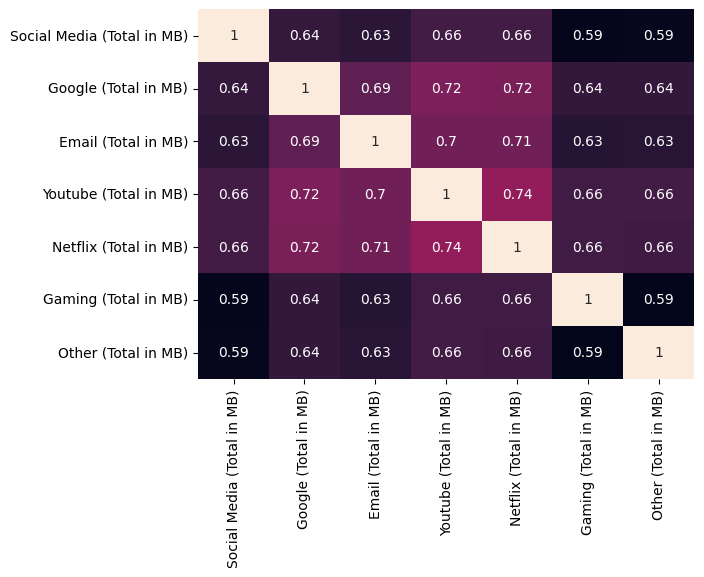

In [7]:
apps=['Social Media','Google','Email','Youtube','Netflix','Gaming','Other']
plot_corr(overview_data,apps)

* Key finding from the correlation:
  1. The highest relationship was seen by netfix and youtube users. This implies the fairly equal consumption of youtube videos and netflix movies.
  2. The least relationship was seen between `gaming` and `Other` users. This shows that users who use `gaming` apps are not often seen using the apps mentioned in `Other` 

In [8]:
sub=Subtask(df)
sub.subtasks()

The top 10 handsets used by the customers are:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: count, dtype: int64
The top 3 handset manufacturers are:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64
The top 5 handsets for Apple are:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Name: count, dtype: int64
The top 5 handsets for Samsung are:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Name: count, dtype: int64
The top 5 handsets for Huawei are:
Handset T